<a href="https://colab.research.google.com/github/Kunal726/LP5/blob/main/MNIST_Fashion_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0


In [6]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 17s 3ms/step - loss: 0.4620 - accuracy: 0.8317
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3121 - accuracy: 0.8861
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2661 - accuracy: 0.9019
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2346 - accuracy: 0.9128
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2099 - accuracy: 0.9219
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1882 - accuracy: 0.9304
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1702 - accuracy: 0.9372
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1546 - accuracy: 0.9429
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1416 - accuracy: 0.9463
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.12

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2589 - accuracy: 0.9124
Test accuracy: 0.9124000072479248


In [14]:
test_pred = model.predict(test_images)
predicted_labels = np.argmax(test_pred, axis= 1)

313/313 [==============================] - 1s 2ms/step


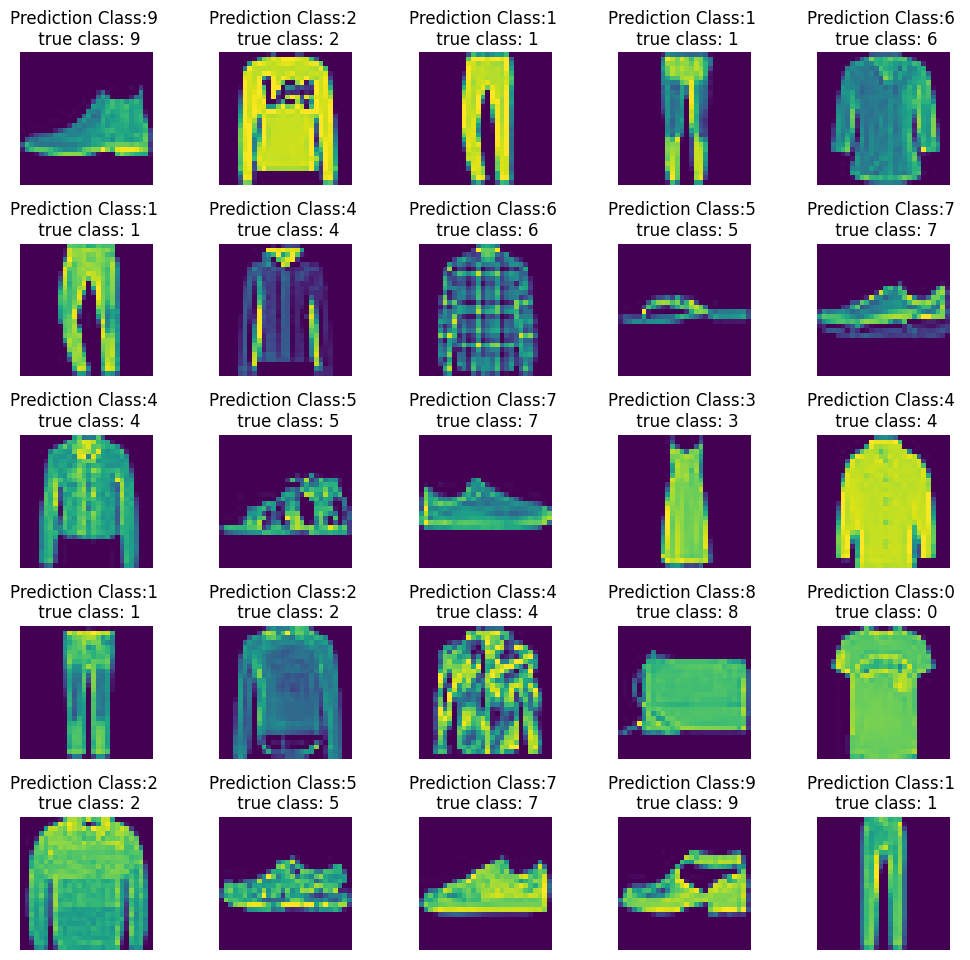

In [16]:
L = 5
W = 5

fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(test_images[i])
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_labels[i],test_labels[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5) 